In [6]:
%matplotlib inline

In [33]:
#Suppose we want to interpolate the 2-D function

def func(x, y):
    return x*(1-x)*np.cos(4*np.pi*x) * np.sin(4*np.pi*y**2)**2

#on a grid in [0, 1]x[0, 1]

grid_x, grid_y = np.mgrid[0:1:100j, 0:1:200j]

In [ ]:
#but we only know its values at 1000 data points:

points = np.random.rand(1000, 2)
values = func(points[:,0], points[:,1])

#This can be done with `griddata` -- below we try out all of the
#interpolation methods:

from scipy.interpolate import griddata
grid_z0 = griddata(points, values, (grid_x, grid_y), method='nearest')
grid_z1 = griddata(points, values, (grid_x, grid_y), method='linear')
grid_z2 = griddata(points, values, (grid_x, grid_y), method='cubic')

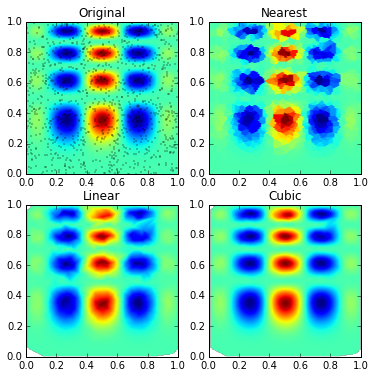

In [8]:
#One can see that the exact result is reproduced by all of the
#methods to some degree, but for this smooth function the piecewise
#cubic interpolant gives the best results:

import matplotlib.pyplot as plt
plt.subplot(221)
plt.imshow(func(grid_x, grid_y).T, extent=(0,1,0,1), origin='lower')
plt.plot(points[:,0], points[:,1], 'k.', ms=1)
plt.title('Original')
plt.subplot(222)
plt.imshow(grid_z0.T, extent=(0,1,0,1), origin='lower')
plt.title('Nearest')
plt.subplot(223)
plt.imshow(grid_z1.T, extent=(0,1,0,1), origin='lower')
plt.title('Linear')
plt.subplot(224)
plt.imshow(grid_z2.T, extent=(0,1,0,1), origin='lower')
plt.title('Cubic')
plt.gcf().set_size_inches(6, 6)
plt.show()